In [1]:
# Importing pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.cuda.get_device_name(0)

'GeForce 940MX'

In [2]:
torch.cuda.is_available()

True

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('iris.csv')
data.shape

(150, 6)

In [5]:
data.drop('Id', inplace=True, axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data['Species'] = np.where(data['Species']=='Iris-setosa', 0, data['Species']  )
data['Species'] = np.where(data['Species']=='Iris-virginica', 1, data['Species'])
data['Species'] = np.where(data['Species']=='Iris-versicolor', 2, data['Species'])

In [8]:
data['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [9]:
X = data.drop(['Species'], axis=1).values
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
y = data['Species'].values.astype(int)
y[:5]

array([0, 0, 0, 0, 0])

In [11]:
# Splitting into train and test 80-20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
# Converting arrays to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
# Creating the architecture of the ANN

class ANN_Model(nn.Module):
    def __init__(self, input_features=4, hidden1=4, hidden2=4, out_features=3):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [14]:
# Instantiate the model
torch.manual_seed(1)
model = ANN_Model()

In [15]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=4, out_features=4, bias=True)
  (f_connected2): Linear(in_features=4, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=3, bias=True)
)>

In [16]:
# Backpropagation - Loss function, optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [17]:
# Hyperparameters
epochs = 500
final_losses = []
for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss)
    if(i%10==0):
        print("In Epoch {}, the loss is: {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In Epoch 10, the loss is: 0.9451099038124084
In Epoch 20, the loss is: 0.765754759311676
In Epoch 30, the loss is: 0.5666323900222778
In Epoch 40, the loss is: 0.45492124557495117
In Epoch 50, the loss is: 0.39158761501312256
In Epoch 60, the loss is: 0.3389357626438141
In Epoch 70, the loss is: 0.2781373858451843
In Epoch 80, the loss is: 0.2108338624238968
In Epoch 90, the loss is: 0.14994825422763824
In Epoch 100, the loss is: 0.10645761340856552
In Epoch 110, the loss is: 0.08029015362262726
In Epoch 120, the loss is: 0.06541053205728531
In Epoch 130, the loss is: 0.05660166218876839
In Epoch 140, the loss is: 0.050944384187459946
In Epoch 150, the loss is: 0.04701954498887062
In Epoch 160, the loss is: 0.04411822184920311
In Epoch 170, the loss is: 0.04186910018324852
In Epoch 180, the loss is: 0.04006180912256241
In Epoch 190, the loss is: 0.038566961884498596
In Epoch 200, the loss is: 0.0373007208108902
In Epoch 210, the loss is: 0.03620561212301254
In Epoch 220, the loss is: 0

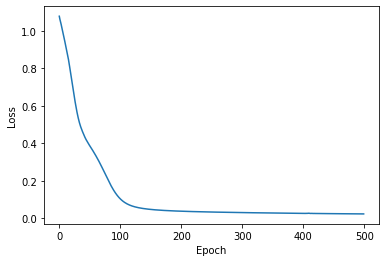

In [19]:
# Loss function
plt.plot(range(epochs), final_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()